## Dataset Summary

### This dataset contains over 14,000 images that need to be classified into 6 distinct categories. Here’s a quick breakdown:
- Total Images: 14,000+
- Classes: 6 categories, each representing a unique label for classification.
- Image Format: Likely standardized (e.g., JPEG, PNG).
- Size and Quality: Varies, but typically consistent for training uniformity.
- Typical Categories in Image Classification

### While not specified, common image classification categories could include:
- Natural Scenes: Different environments (e.g., mountains, forests).
- Urban and Rural Scenes: Different landscapes (e.g., streets, buildings).
- Objects: Specific items within scenes.

#### Use Case:

The model developed from this dataset would likely employ CNNs (Convolutional Neural Networks) due to their effectiveness in image feature extraction and spatial hierarchy, aiming for a high accuracy similar to 98% as mentioned in your Intel classification example.

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import cv2
import tensorflow as tf
import keras
import os
from sklearn.metrics import confusion_matrix

2024-12-06 20:13:41.846331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Import Data And Preprocessing

In [2]:
train_path = 'archive/seg_train/'
test_path = 'archive/seg_test/'
pred_path = 'archive/seg_pred/'

In [3]:
def open_folders(path, file, name = 'Traning Data'):
    for folder in os.listdir(path + file):
        files = gb.glob(pathname = path + file + '/' + folder + '/*.jpg')
        print(f'For {name} : Found {len(files)} images in folder {folder}')

print('-' * 40 + ' Traning Data ' + '-' * 46)
open_folders(train_path, 'seg_train')
print('\n' + '-' * 40 + ' Test Data ' + '-' * 50)
open_folders(test_path, 'seg_test', name = 'Test Data')
print('\n' +'-' * 40 + ' Prediction Data ' + '-' * 44)
files = gb.glob(pathname = pred_path + 'seg_pred' + '/*.jpg')
print(f'For Prediction Data : Found {len(files)} images in folder Prediction')

---------------------------------------- Traning Data ----------------------------------------------
For Traning Data : Found 2271 images in folder forest
For Traning Data : Found 2191 images in folder buildings
For Traning Data : Found 2404 images in folder glacier
For Traning Data : Found 2382 images in folder street
For Traning Data : Found 2512 images in folder mountain
For Traning Data : Found 2274 images in folder sea

---------------------------------------- Test Data --------------------------------------------------
For Test Data : Found 474 images in folder forest
For Test Data : Found 437 images in folder buildings
For Test Data : Found 553 images in folder glacier
For Test Data : Found 501 images in folder street
For Test Data : Found 525 images in folder mountain
For Test Data : Found 510 images in folder sea

---------------------------------------- Prediction Data --------------------------------------------
For Prediction Data : Found 7301 images in folder Prediction


### Shape of the images

In [4]:
def get_image_size(path, folder_name):
    size = []
    if folder_name != 'seg_pred':
        for folder in os.listdir(path + folder_name):
            files = gb.glob(pathname = path + folder_name + '/' + folder + '/*.jpg')
            for file in files:
                image = plt.imread(file)
                size.append(image.shape)
    else:
        files = gb.glob(pathname = path + folder_name + '/*.jpg')
        for file in files:
            image = plt.imread(file)
            size.append(image.shape)
    
    print(pd.Series(size).value_counts())

print('-' * 40 + ' Traning Data ' + '-' * 46)
get_image_size(train_path, 'seg_train')
print('\n' +'-' * 40 + ' Test Data ' + '-' * 50)
get_image_size(test_path, 'seg_test')
print('\n' +'-' * 40 + ' Prediction Data ' + '-' * 44)
get_image_size(pred_path, 'seg_pred')

---------------------------------------- Traning Data ----------------------------------------------
(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(136, 150, 3)        2
(134, 150, 3)        2
(108, 150, 3)        2
(142, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(144, 150, 3)        2
(124, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(105, 150, 3)        1
(76, 150, 3)         1
(149, 150, 3)        1
(102, 150, 3)        1
(110, 150, 3)        1
(97, 150, 3)         1
(119, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(103, 150, 3)        1
(131, 150, 3)        1
(100, 150, 3)        1
(81, 150, 3)         1
(141, 150, 3)        1
(145, 150, 3)        1
(140, 150, 3)        1
Name: count, dtype: int64

---------------------------------------- Test Data --------------------------------------------------
(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)

Most of the images are sized +/- `150x150x3`, and they need to be uniform in size for the model, which only accepts input in one specific dimension. To avoid losing significant information, we will resize them to `100x100x3`.

### Visualization for each folder/class

---------------------------------------- Training Data ----------------------------------------------
Found 2271 images in folder forest (Training Data)


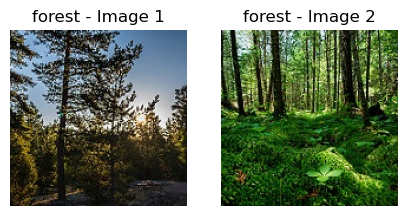

Found 2191 images in folder buildings (Training Data)


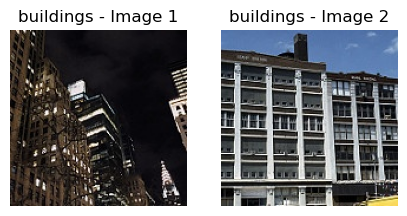

Found 2404 images in folder glacier (Training Data)


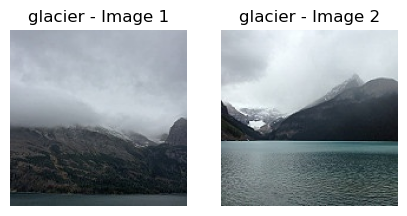

Found 2382 images in folder street (Training Data)


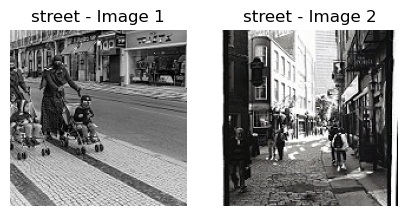

Found 2512 images in folder mountain (Training Data)


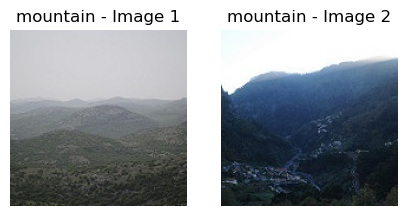

Found 2274 images in folder sea (Training Data)


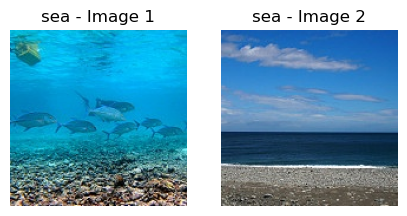


---------------------------------------- Test Data --------------------------------------------------
Found 474 images in folder forest (Test Data)


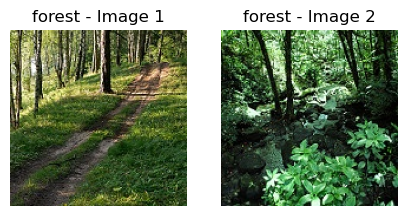

Found 437 images in folder buildings (Test Data)


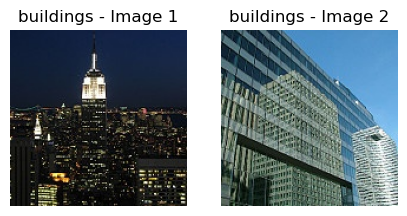

Found 553 images in folder glacier (Test Data)


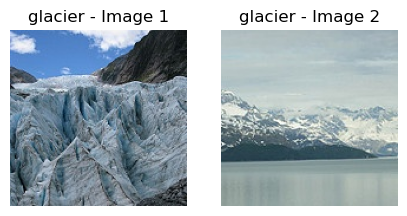

Found 501 images in folder street (Test Data)


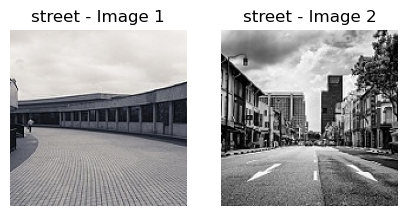

Found 525 images in folder mountain (Test Data)


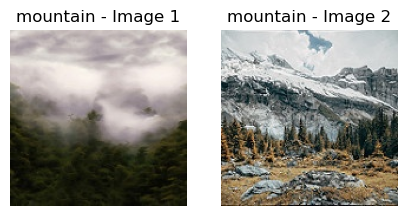

Found 510 images in folder sea (Test Data)


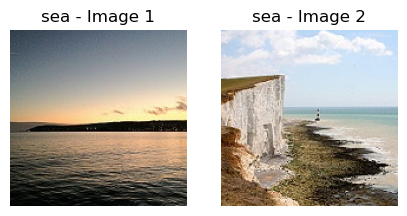


---------------------------------------- Prediction Data --------------------------------------------
For Prediction Data : Found 7301 images in folder Prediction


In [5]:
def open_folders(path, file, name='Training Data'):
    for folder in os.listdir(path + file):
        files = gb.glob(pathname=path + file + '/' + folder + '/*.jpg')
        print(f'Found {len(files)} images in folder {folder} ({name})')
        
        # Display two images from each folder
        fig, axes = plt.subplots(1, 2, figsize=(5, 5))
        for i, img_path in enumerate(files[:2]):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].set_title(f'{folder} - Image {i+1}')
            axes[i].axis('off')
        plt.show()

print('-' * 40 + ' Training Data ' + '-' * 46)
open_folders(train_path, 'seg_train')
print('\n' + '-' * 40 + ' Test Data ' + '-' * 50)
open_folders(test_path, 'seg_test', name='Test Data')
print('\n' + '-' * 40 + ' Prediction Data ' + '-' * 44)
files = gb.glob(pathname=pred_path + 'seg_pred' + '/*.jpg')
print(f'For Prediction Data : Found {len(files)} images in folder Prediction')

In [6]:
code = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

# Get the labels for the images
def getcode(n):
    for x, y in code.items():
        if n == y:
            return x

In [7]:
x_train = []
y_train = []

for folder in os.listdir(train_path + 'seg_train'):
    files = gb.glob(pathname = train_path + 'seg_train/' + folder + '/*.jpg')
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image, (150, 150))
        x_train.append(list(image_array))
        y_train.append(code[folder])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = []
y_test = []

for folder in os.listdir(test_path + 'seg_test'):
    files = gb.glob(pathname = test_path + 'seg_test/' + folder + '/*.jpg')
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image, (150, 150))
        x_test.append(list(image_array))
        y_test.append(code[folder])

x_test = np.array(x_test)
y_test = np.array(y_test)

x_pred = []
y_pred = []

files = gb.glob(pathname = pred_path + 'seg_pred' + '/*.jpg')
for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (150, 150))
    x_pred.append(list(image_array))
    y_pred.append(file.split('/')[-1])

x_pred = np.array(x_pred)
y_pred = np.array(y_pred)

# Normalize the data
x_train = x_train / 255
x_test = x_test / 255
x_pred = x_pred / 255


In [8]:
print('-' * 40 + ' Traning Data ' + '-' * 46)
print(f'We Have {len(x_train)} Image In X_train')
print(f'We Have {len(y_train)} items In y_train ')

print('\n' +'-' * 40 + ' Test Data ' + '-' * 50)
print(f'We Have {len(x_test)} Image In X_test')
print(f'We Have {len(y_test)} items In y_test')

print('\n' +'-' * 40 + ' Prediction Data ' + '-' * 44)
print(f'We Have {len(x_pred)} Image In X_pred')

---------------------------------------- Traning Data ----------------------------------------------
We Have 14034 Image In X_train
We Have 14034 items In y_train 

---------------------------------------- Test Data --------------------------------------------------
We Have 3000 Image In X_test
We Have 3000 items In y_test

---------------------------------------- Prediction Data --------------------------------------------
We Have 7301 Image In X_pred


In [9]:
X_train, y_train = np.array(x_train) , np.array(y_train) 
X_test, y_test = np.array(x_test) , np.array(y_test) 
X_pred  = np.array(x_pred) 

print(f'X_train shape  is {X_train.shape}') 
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'X_pred shape  is {X_pred.shape}')

X_train shape  is (14034, 150, 150, 3)
X_test shape  is (3000, 150, 150, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)
X_pred shape  is (7301, 150, 150, 3)


## Build CNN Model

5 convolutional layers:
- Conv2D (256 filters)
- Conv2D (128 filters)
- Conv2D (64 filters)
- Conv2D (32 filters)
- Conv2D (16 filters)

In [11]:
cnnModel = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size = (3, 3), activation='relu', input_shape = (100, 100, 3)), # feature map -> (98, 98, 256)
    keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'), # feature map -> (96, 96, 128)
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(3, 3), # feature map -> (32, 32, 128)
    keras.layers.Conv2D(64, kernel_size = (3, 3), activation='relu'), # feature map -> (30, 30, 64)
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation= 'relu'),  # feature map -> (28, 28, 32)
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'), # feature map -> (26, 26, 16)
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(3, 3),  # feature map -> (8, 8, 16) 
    
    keras.layers.Flatten(),  # 1024
    keras.layers.Dense(128, activation = 'relu'), 
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(6, activation='softmax')
])

print(cnnModel.summary())

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 98, 98, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 96, 96, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 96, 96, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,398 (2.07 MB)

 Trainable params: 541,110 (2.06 MB)

 Non-trainable params: 288 (1.12 KB)

None


In [ ]:
cnnModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnnModel.fit(X_train, y_train, epochs = 25, batch_size=64, verbose=1)

In [ ]:
loss, accuracy = cnnModel.evaluate(X_test, y_test)
print('Test Loss is {}'.format(loss))
print('Test Accuracy is {}'.format(accuracy ))

In [ ]:
y_test_pred = cnnModel.predict(X_test)
print(f'Prediction Shape is {y_test_pred.shape}')

In [12]:
def plot_confusion_matrix(true_labels, pred_labels, class_names):
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
class_names = ['buildings','forest','glacier','mountain','sea','street' ]   
pred_labels = np.argmax(y_test_pred, axis=1)  
plot_confusion_matrix(y_test, pred_labels, class_names)